<a href="https://colab.research.google.com/github/yeonghun00/stock-notes/blob/main/leveraged%20index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yf

symbol = '^GSPC'
data = yf.Ticker(symbol)
df = data.history(period='1d', start='1985-1-1', end='2022-7-1')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1985-01-02,167.199997,167.199997,165.190002,165.369995,67820000,0,0
1985-01-03,165.369995,166.110001,164.380005,164.570007,88880000,0,0
1985-01-04,164.550003,164.550003,163.360001,163.679993,77480000,0,0
1985-01-07,163.679993,164.710007,163.679993,164.240005,86190000,0,0
1985-01-08,164.240005,164.589996,163.910004,163.990005,92110000,0,0
...,...,...,...,...,...,...,...
2022-06-24,3821.750000,3913.649902,3821.750000,3911.739990,6742870000,0,0
2022-06-27,3920.760010,3927.719971,3889.659912,3900.110107,3385120000,0,0
2022-06-28,3913.000000,3945.860107,3820.139893,3821.550049,3590980000,0,0


In [3]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt

def get_mdd(df='', days=250*40):
  df_ = pd.DataFrame(df).fillna(method='ffill').dropna()[-days:]
  window = 250
  max_in_window = df_['Close'].rolling(window, min_periods=1).max()
  dd = (df_['Close']/max_in_window-1)*100
  mdd = dd.rolling(window, min_periods=1).min()
  return df_, dd, mdd

def plot_mdd(df_, dd, mdd):
  fig, axs = plt.subplots(3, figsize=(20,10))
  axs[0].title.set_text('Close')
  axs[0].plot(df_['Close'])
  axs[1].title.set_text('DD')
  axs[1].plot(dd)
  axs[2].title.set_text('MDD')
  axs[2].plot(mdd, 'r')
  plt.show()

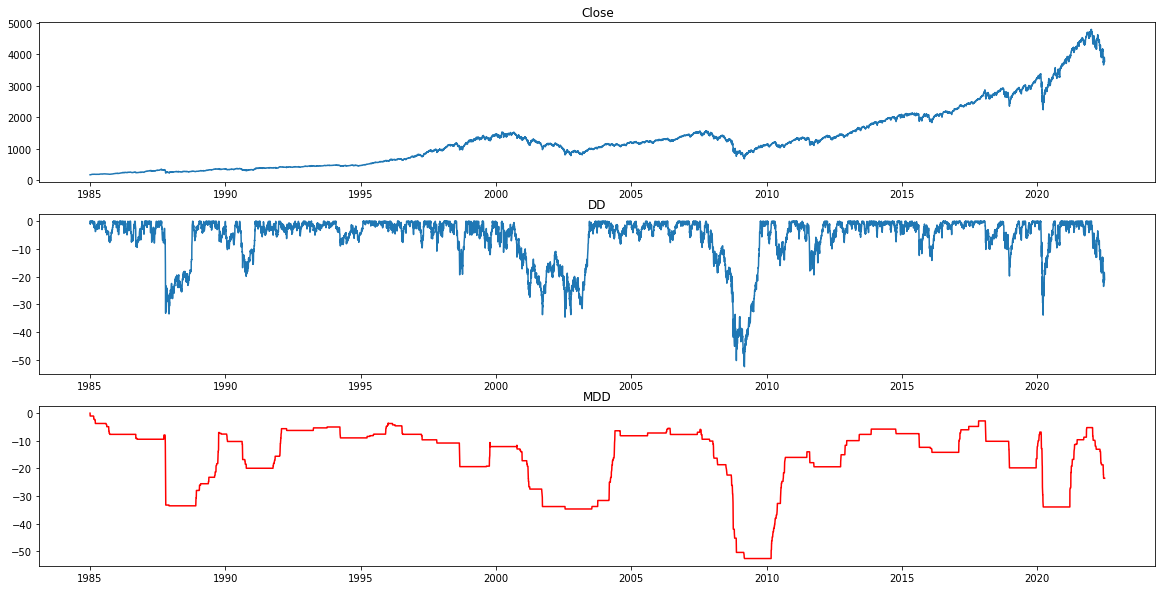

In [4]:
df_, dd, mdd = get_mdd(df, len(df['Close']))
plot_mdd(df_, dd, mdd)

In [5]:
close = df['Close'][1:].values / df['Close'][:-1].values
dates = pd.date_range(end='2022/7/1', periods=len(close))
snp500_change_df = pd.DataFrame({'Change':close}, index=dates)

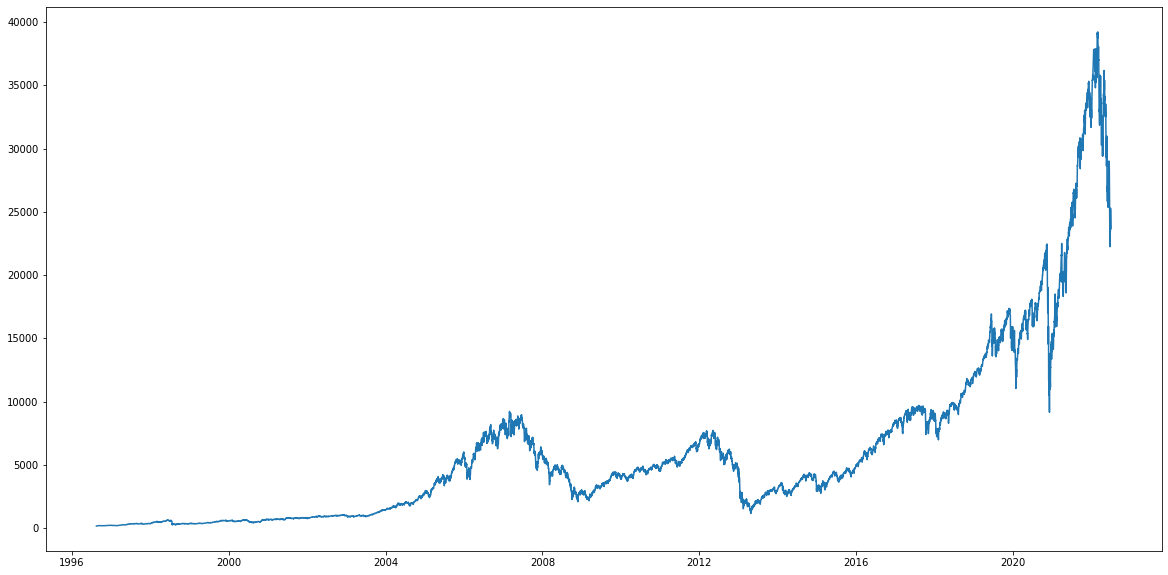

In [6]:
# s&p500 x2
import datetime
import numpy as np
import math
import random

change_df = 1+(snp500_change_df-1)*2
close_df = np.cumprod(change_df).rename(columns={'Change':'Close'}) * df['Close'][0] 
plt.figure(figsize=(20,10))
plt.plot(close_df)
plt.show()

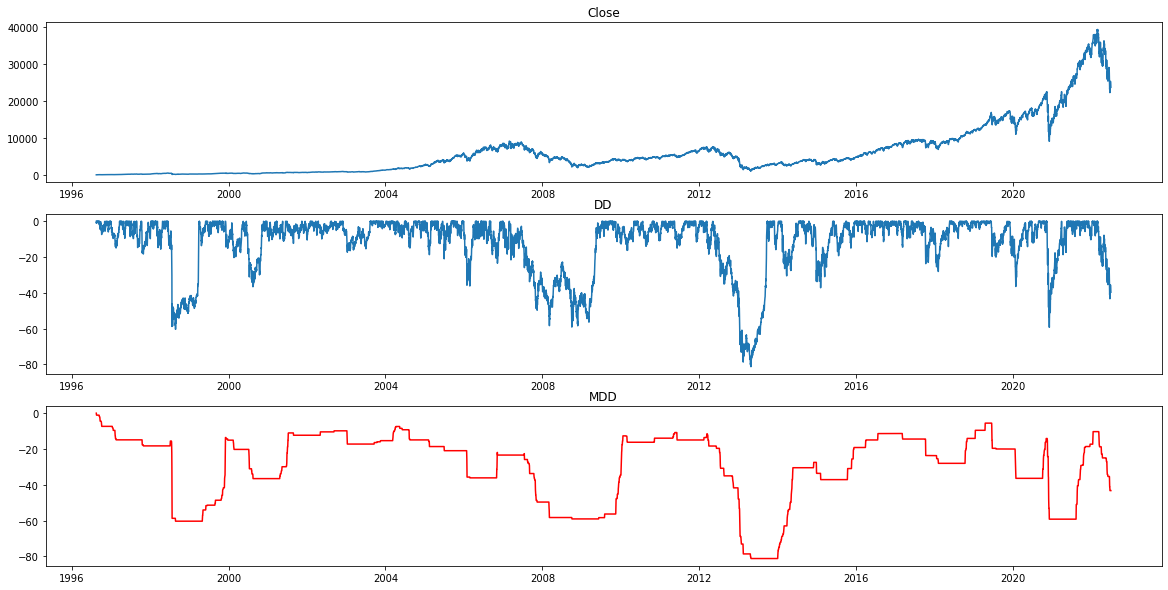

Min MDD:  -81.22830140791176


In [7]:
df_, dd, mdd = get_mdd(close_df, len(close_df['Close']))
plot_mdd(df_, dd, mdd)
print("Min MDD: ", min(mdd))

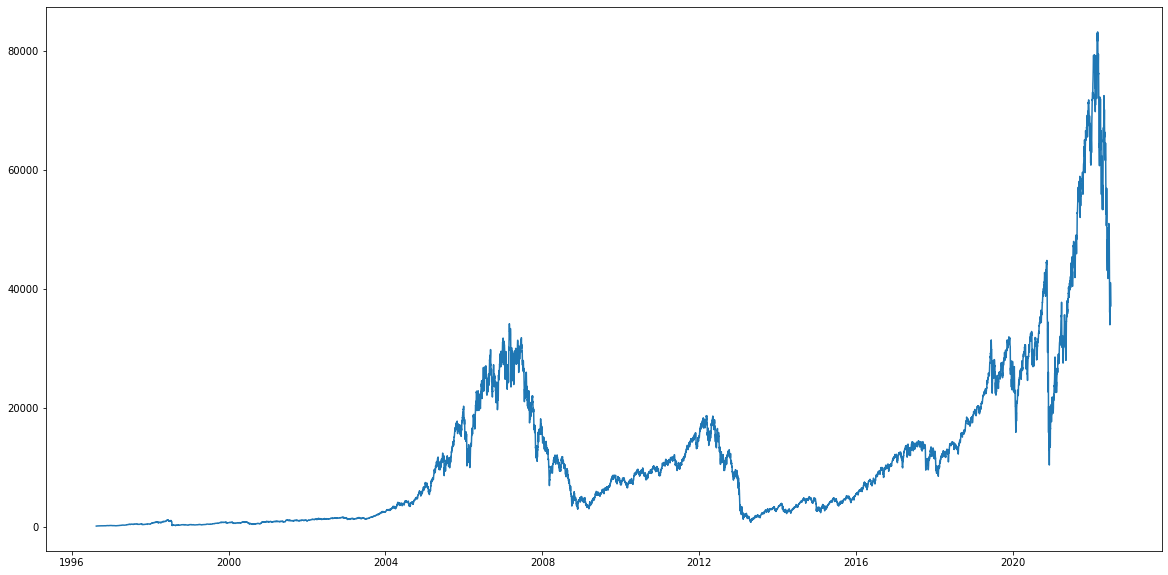

In [8]:
# s&p500 x3
change_df = 1+(snp500_change_df-1)*3
close_df = np.cumprod(change_df).rename(columns={'Change':'Close'}) * df['Close'][0] 

plt.figure(figsize=(20,10))
plt.plot(close_df)
plt.show()

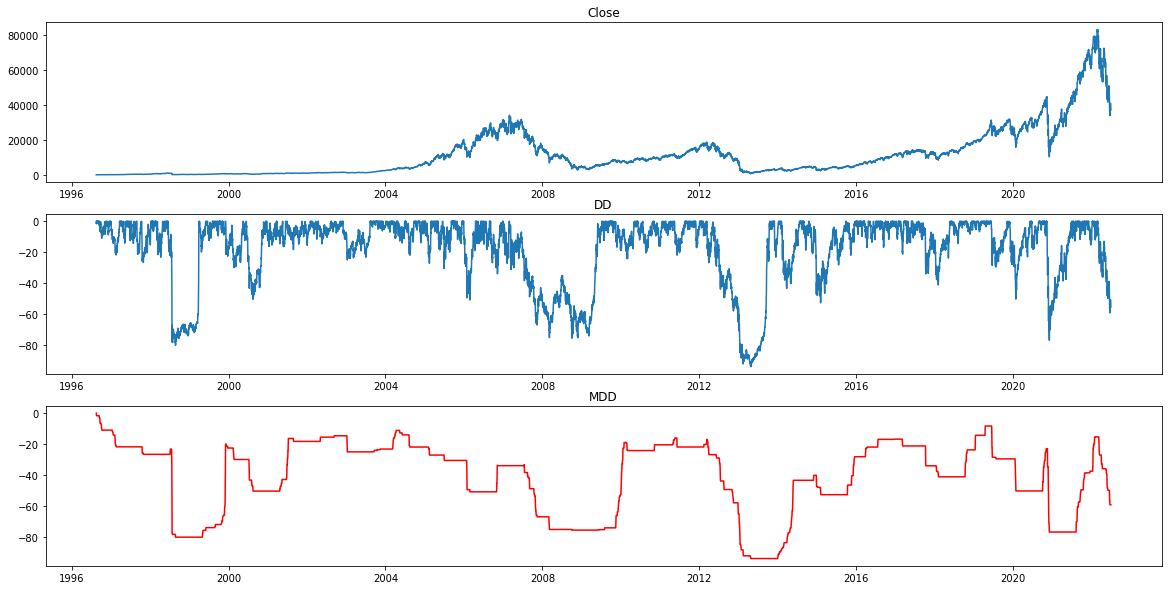

Min MDD:  -93.84864750297398


In [9]:
df_, dd, mdd = get_mdd(close_df, len(df['Close']))
plot_mdd(df_, dd, mdd)
print("Min MDD: ", min(mdd))

In [10]:
m = np.mean(df['Close'][1:].values / df['Close'][:-1].values)
var = np.var(df['Close'][1:].values / df['Close'][:-1].values)

In [11]:
print(m)
print(var)

m = 1.000308456856086
var = 0.000232283567091727

1.000398456856086
0.0001332283567091727


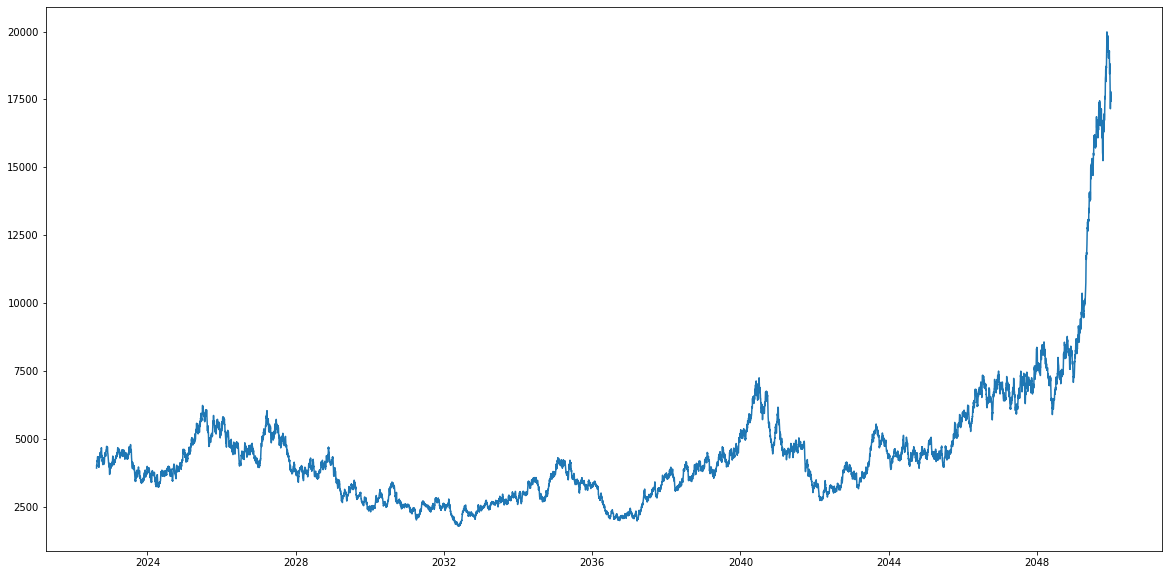

In [12]:
close = [random.gauss(m, math.sqrt(var)) for i in range(250*40)]
dates = pd.date_range(end='2050/1/1', periods=250*40)
change_df = pd.DataFrame({'Change':close}, index=dates)
close_df = np.cumprod(change_df).rename(columns={'Change':'Close'}) * 4000

plt.figure(figsize=(20,10))
plt.plot(close_df)
plt.show()

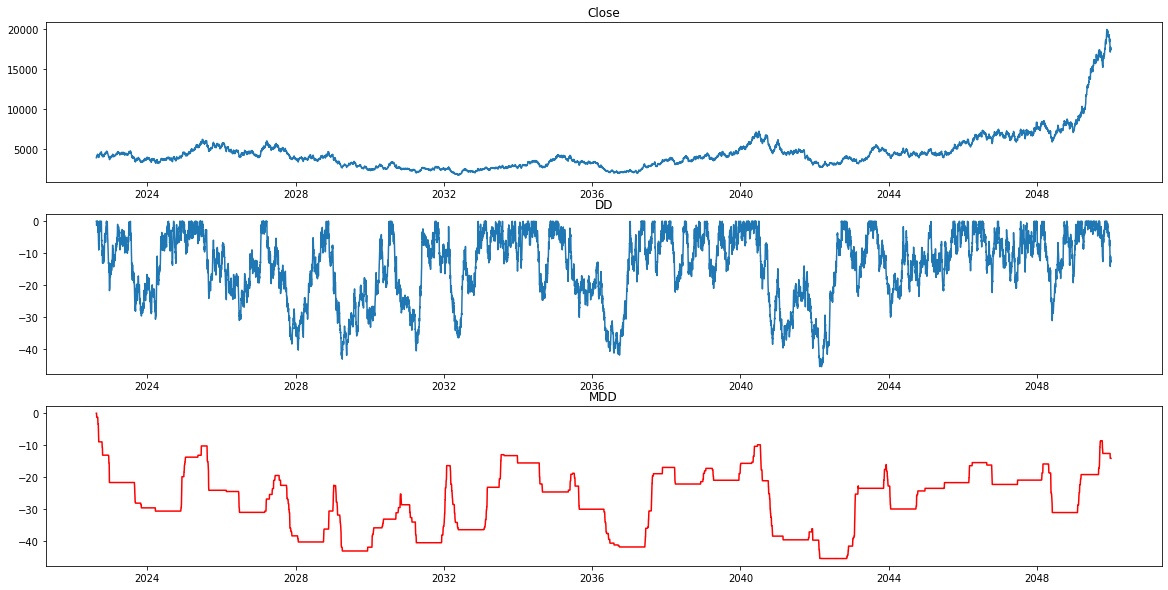

In [13]:
df_, dd, mdd = get_mdd(close_df)

fig, axs = plt.subplots(3, figsize=(20,10))
axs[0].title.set_text('Close')
axs[0].plot(df_['Close'])
axs[1].title.set_text('DD')
axs[1].plot(dd)
axs[2].title.set_text('MDD')
axs[2].plot(mdd, 'r')
plt.show()

In [14]:
sample_num = 5

close_li = [pd.DataFrame({'Change':[random.gauss(m, math.sqrt(var)) for i in range(250*40)]}, index=dates) for x in range(sample_num)]
close_li = list(map(lambda x: np.cumprod(x).rename(columns={'Change':'Close'}) * 4000, close_li))

In [15]:
li = list(map(lambda x: get_mdd(x), close_li))
dd_li, mdd_li = [x[1] for x in li], [x[2] for x in li]

In [16]:
[min(x) for x in mdd_li]

[-37.70772657716084,
 -45.7782870584563,
 -50.79945435629829,
 -48.70792405358372,
 -37.36573696099747]